In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import shap
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from matplotlib.patches import Rectangle
from pywaffle import Waffle
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score, cohen_kappa_score, classification_report
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, cohen_kappa_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from pyswarms.single import GlobalBestPSO
from sklearn.preprocessing import PowerTransformer
from imblearn.under_sampling import RandomUnderSampler

In [3]:
file_path = r"D:\Kuliah IPB\02 Kuliah\03 Semester 3\Pemodelan Klasifikasi\UAS\df_model.csv"
df_model = pd.read_csv(file_path, index_col=0)
df_model

,R105,KALORI_KAP,PROTE_KAP,LEMAK_KAP,KARBO_KAP,FOOD_LABEL,Pengeluaran_Jenis_A,Pengeluaran_Jenis_B,Pengeluaran_Jenis_C,Pengeluaran_Jenis_D,...,Pengeluaran_Jenis_M,Pengeluaran_Jenis_N,R2208A2,R2208A3,R2208A4,R2208A5,nilai_bantuan(rp),rataan_beras(rp),rataan_telur(rp),rataan_lainnya(rp)
URUT,,,,,,,,,,,,,,,,,,,,,
500001,2,2365.173362,67.130240,43.222388,352.985743,0,1,1,1,1,...,1,0,Tidak,Tidak,Ya,Tidak,150000.0,50000.0,10000.0,17500.0
500002,1,2611.639071,69.091893,30.118243,471.997686,0,1,1,1,0,...,1,1,Tidak,Tidak,Tidak,Ya,150000.0,27500.0,6500.0,8000.0
500003,2,2526.510476,68.742619,58.517619,360.456190,0,1,0,1,1,...,1,1,Tidak,Tidak,Ya,Tidak,100000.0,60000.0,15000.0,25000.0
500004,1,3655.854810,141.502615,119.460426,454.939531,0,1,1,1,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
500005,1,2330.987934,78.533354,53.141607,254.846110,0,1,0,1,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525886,1,2227.460536,81.321857,45.307661,306.247218,0,1,1,1,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
525887,1,1711.114357,68.675743,46.467657,212.155300,0,1,0,1,1,...,1,0,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
525888,1,1621.781673,48.896660,45.535567,215.970774,0,1,0,0,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0


In [4]:
categorical_columns = ['R2208A2', 'R2208A3', 'R2208A4', 'R2208A5']
for col in categorical_columns:
    df_model[col] = df_model[col].map({'Tidak': 0, 'Ya': 1})
df_model[categorical_columns].head()

,R2208A2,R2208A3,R2208A4,R2208A5
URUT,,,,
500001,0,0,1,0
500002,0,0,0,1
500003,0,0,1,0
500004,0,0,0,0
500005,0,0,0,0


In [5]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25890 entries, 500001 to 525890
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   R105                 25890 non-null  int64  
 1   KALORI_KAP           25890 non-null  float64
 2   PROTE_KAP            25890 non-null  float64
 3   LEMAK_KAP            25890 non-null  float64
 4   KARBO_KAP            25890 non-null  float64
 5   FOOD_LABEL           25890 non-null  int64  
 6   Pengeluaran_Jenis_A  25890 non-null  int64  
 7   Pengeluaran_Jenis_B  25890 non-null  int64  
 8   Pengeluaran_Jenis_C  25890 non-null  int64  
 9   Pengeluaran_Jenis_D  25890 non-null  int64  
 10  Pengeluaran_Jenis_E  25890 non-null  int64  
 11  Pengeluaran_Jenis_F  25890 non-null  int64  
 12  Pengeluaran_Jenis_G  25890 non-null  int64  
 13  Pengeluaran_Jenis_H  25890 non-null  int64  
 14  Pengeluaran_Jenis_I  25890 non-null  int64  
 15  Pengeluaran_Jenis_J  25890 non-null

# Split Data

In [20]:
X = df_model.drop(['FOOD_LABEL', 'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP'], axis=1)
y = df_model['FOOD_LABEL']

# # SMOTE terbaik dengan ratio=1
# sm = SMOTE(random_state=123, sampling_strategy=0.75)
# X, y = sm.fit_resample(X, y)

X_ori = X.copy()
y_ori = y.copy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=86)

In [21]:
print(X_train.shape)
print(X_test.shape)

(18123, 24)
(7767, 24)


In [22]:
def eval_model_holdout(model, xtrain, ytrain, xtest, ytest, plot=False):
    model.fit(xtrain, ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)
    
    cm_test = confusion_matrix(ytest, y_pred_test)
    tn, fp, fn, tp = cm_test.ravel()
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) 

    print("Holdout Evaluation (Train):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytrain, y_pred_train), 2))
    print("F1 Score:", round(f1_score(ytrain, y_pred_train), 2))
    print("Kappa:", round(cohen_kappa_score(ytrain, y_pred_train), 2))

    print("\nHoldout Evaluation (Test):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytest, y_pred_test), 2))
    print("F1 Score:", round(f1_score(ytest, y_pred_test), 2))
    print("Kappa:", round(cohen_kappa_score(ytest, y_pred_test), 2))
    print("Sensitivity (Recall):", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Tidak Miskin', 'Miskin'], yticklabels=['Tidak Miskin', 'Miskin'])
        plt.title('Confusion Matrix Testing Data')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

In [23]:
cv = KFold(n_splits=10, shuffle=True, random_state=86)

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)
sensitivity_scorer = make_scorer(recall_score)

def eval_model_CV(model, X, y):    
    cv_results = cross_validate(
        model, X, y, cv=cv, 
        scoring={
            'balanced_accuracy': 'balanced_accuracy',
            'f1': 'f1',
            'kappa': make_scorer(cohen_kappa_score),
            'sensitivity': sensitivity_scorer,
            'specificity': specificity_scorer
        },
        return_train_score=False
    )

    balanced_acc_scores = cv_results['test_balanced_accuracy']
    f1_scores = cv_results['test_f1']
    kappa_scores = cv_results['test_kappa']
    sensitivity_scores = cv_results['test_sensitivity']
    specificity_scores = cv_results['test_specificity']
    
    mean_bal_acc = round(np.mean(balanced_acc_scores), 2)
    mean_f1 = round(np.mean(f1_scores), 2)
    mean_kappa = round(np.mean(kappa_scores), 2)
    mean_sensitivity = round(np.mean(sensitivity_scores), 2)
    mean_specificity = round(np.mean(specificity_scores), 2)
    
    print('Mean Bal Acc (Test)  :', mean_bal_acc)
    print('Mean F1 Score (Test) :', mean_f1)
    print('Mean Kappa (Test)    :', mean_kappa)
    print('Mean Sensitivity (Test):', mean_sensitivity)
    print('Mean Specificity (Test):', mean_specificity)

In [24]:
def mergeXy_for_CV(X1, X2):
    merge_X = pd.concat([X1, X2], ignore_index=True)
    merge_y = y_train.tolist() + y_test.tolist()
    return merge_X, merge_y

# Baseline Model

In [25]:
xgb = XGBClassifier(random_state=86, eval_metric='logloss')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8,10],
    'n_estimators': [50, 100, 150, 200, 250]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='balanced_accuracy', 
    cv=10,  
    n_jobs=-1, 
    verbose=1  
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Parameter terbaik untuk data Anda:", best_params)

Fitting 10 folds for each of 35 candidates, totalling 350 fits
Parameter terbaik untuk data Anda: {'max_depth': 5, 'n_estimators': 150}


Holdout Evaluation (Train):
Balanced Accuracy: 0.61
F1 Score: 0.36
Kappa: 0.32

Holdout Evaluation (Test):
Balanced Accuracy: 0.6
F1 Score: 0.33
Kappa: 0.3
Sensitivity (Recall): 0.22
Specificity: 0.99


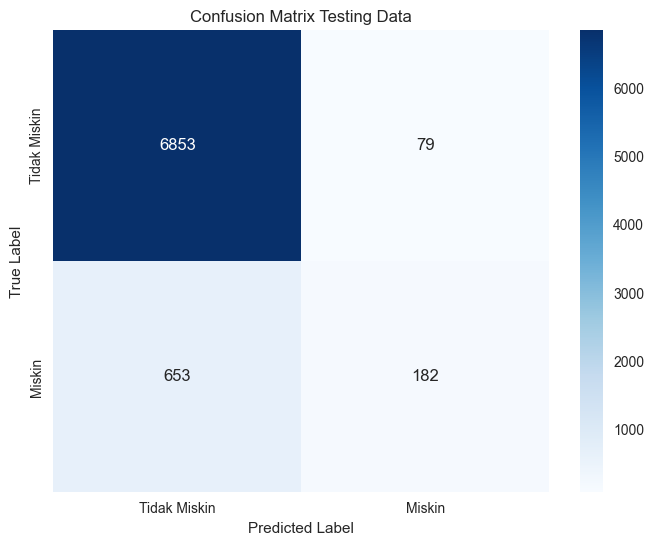

In [26]:
xgb = XGBClassifier(random_state=17, eval_metric='logloss', learning_rate=0.01, max_depth=5, n_estimators=150)
eval_model_holdout(xgb, X_train, y_train, X_test, y_test, plot=True)

In [27]:
eval_model_CV(xgb,X,y)

Mean Bal Acc (Test)  : 0.6
Mean F1 Score (Test) : 0.32
Mean Kappa (Test)    : 0.29
Mean Sensitivity (Test): 0.21
Mean Specificity (Test): 0.99


# Feature Selection

## Variance Threshold

In [14]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [15]:
scaler = MinMaxScaler()
scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

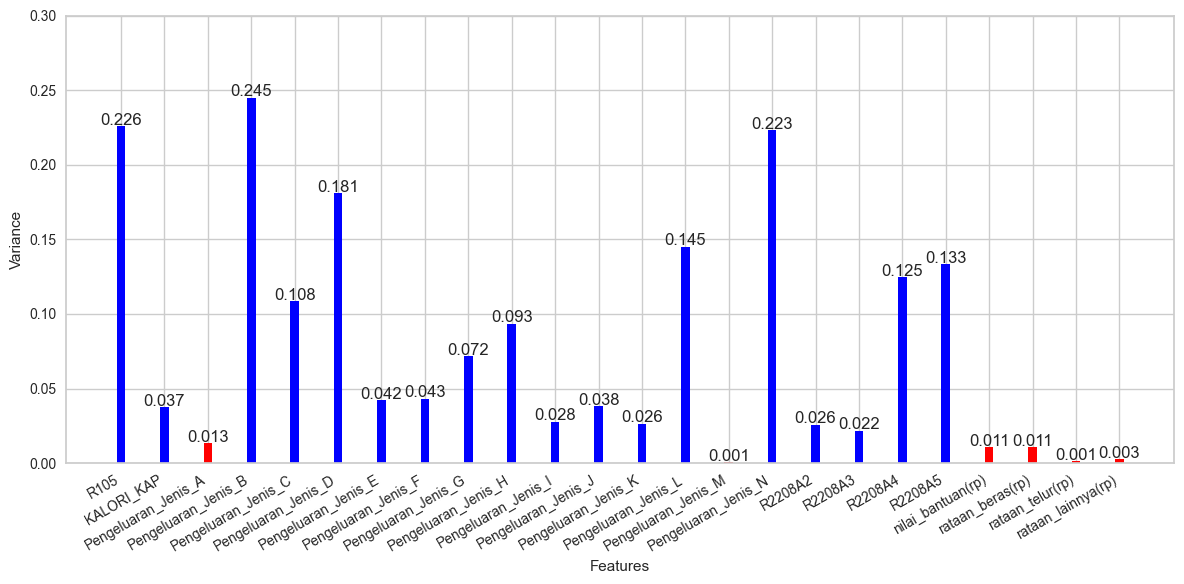

In [16]:
x = X.columns
y = scaled_X_train_v1.var(axis=0)

threshold = 0.02

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['red' if value < threshold else 'blue' for value in y]
bars = ax.bar(x, y, color=colors, width=0.2)

ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.3)

kolom_drop = []
# Tambahkan nilai di atas setiap bar
for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')
    if value < threshold:
        kolom_drop.append(x[index])
    
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [17]:
kolom_drop

['Pengeluaran_Jenis_A',
 'Pengeluaran_Jenis_M',
 'nilai_bantuan(rp)',
 'rataan_beras(rp)',
 'rataan_telur(rp)',
 'rataan_lainnya(rp)']

In [18]:
sel_X_train_v1 = X_train_v1.drop(kolom_drop, axis=1)
sel_X_test_v1 = X_test_v1.drop(kolom_drop, axis=1)

eval_model_holdout(xgb, sel_X_train_v1, y_train, sel_X_test_v1, y_test, plot=False)

Holdout Evaluation (Train):
Balanced Accuracy: 0.68
F1 Score: 0.51
Kappa: 0.47

Holdout Evaluation (Test):
Balanced Accuracy: 0.65
F1 Score: 0.42
Kappa: 0.38
Sensitivity (Recall): 0.31
Specificity: 0.98


In [19]:
X1 = X_ori.copy().drop(kolom_drop, axis=1)
y1 = y_ori.copy()
eval_model_CV(X1,y1)

TypeError: eval_model_CV() missing 1 required positional argument: 'y'

In [ ]:
print(sel_X_train_v1.columns)
len(sel_X_train_v1.columns)

Index(['Pengeluaran_Jenis_B', 'Pengeluaran_Jenis_C', 'Pengeluaran_Jenis_D',
       'Pengeluaran_Jenis_E', 'Pengeluaran_Jenis_F', 'Pengeluaran_Jenis_G',
       'Pengeluaran_Jenis_H', 'Pengeluaran_Jenis_I', 'Pengeluaran_Jenis_J',
       'Pengeluaran_Jenis_K', 'Pengeluaran_Jenis_L', 'Pengeluaran_Jenis_N',
       'R2208A2', 'R2208A3', 'R2208A4', 'R2208A5'],
      dtype='object')


16

## K-Best Feature

In [ ]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
bal_acc_list = []
f1_score_list = []
kappa_list = []
k_list = []

for k in range(1, 10):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    xgb.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = xgb.predict(sel_X_test_v2)
    
    bal_acc_kbest = round(balanced_accuracy_score(y_test_v2, kbest_preds),2)
    f1_score_kbest = round(f1_score(y_test_v2, kbest_preds),2)
    kappa_kbest = round(cohen_kappa_score(y_test_v2, kbest_preds),2)
    
    bal_acc_list.append(bal_acc_kbest)
    f1_score_list.append(f1_score_kbest)
    kappa_list.append(kappa_kbest)
    k_list.append(k)

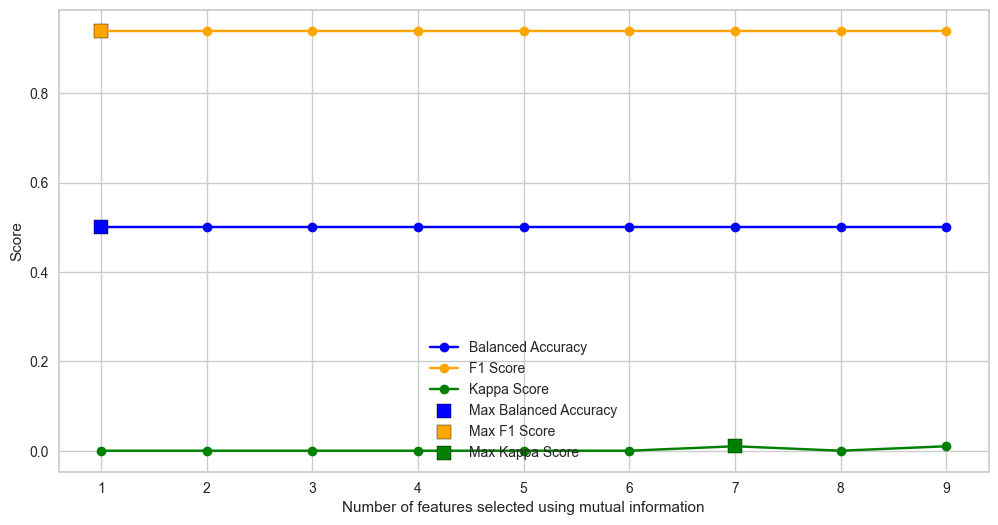

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(k_list, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
plt.plot(k_list, f1_score_list, marker='o', label='F1 Score', color='orange')
plt.plot(k_list, kappa_list, marker='o', label='Kappa Score', color='green')

# Menghitung nilai maksimum
max_bal_acc = np.max(bal_acc_list)
max_f1 = np.max(f1_score_list)
max_kappa = np.max(kappa_list)

# Menampilkan nilai maksimum
plt.scatter(np.argmax(bal_acc_list) + 1, max_bal_acc, color='blue', s=100, edgecolor='black', label='Max Balanced Accuracy', marker='s')
plt.scatter(np.argmax(f1_score_list) + 1, max_f1, color='orange', s=100, edgecolor='black', label='Max F1 Score', marker='s')
plt.scatter(np.argmax(kappa_list) + 1, max_kappa, color='green', s=100, edgecolor='black', label='Max Kappa Score', marker='s')

# Menambahkan label dan judul
plt.xlabel('Number of features selected using mutual information')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print('Max Bal Acc:', max_bal_acc)
print('Max F1 score:', max_f1)
print('Max kappa:', max_kappa)

Max Bal Acc: 0.5
Max F1 score: 0.94
Max kappa: 0.01


In [ ]:
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1
best_k_using_bal_acc

1

In [ ]:
# Setiap di-run fitur yg terpilih berbeda meskipun nilai k-nya sama
selector = SelectKBest(mutual_info_classif, k=best_k_using_bal_acc)
selector.fit(X_train_v2, y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['Pengeluaran_Jenis_H'], dtype='object')

In [ ]:
# Kita evaluasi dengan fitur yg terpilih dari K best (ulangi agar sama spt hasil plot di atas)
eval_model_holdout(xgb, X_train[selected_features], y_train,
                   X_test[selected_features], y_test, plot=False)

Bal Accuracy (Train) : 0.5
F1 score (Train)     : 0.94
Kappa (Train)        : 0.0
Bal Accuracy (Test)  : 0.5
F1 score (Test)      : 0.94
Kappa (Test)         : 0.0


In [ ]:
eval_model_CV(X_ori[selected_features], y_ori)

Mean Bal Acc (Test)  : 0.5
Mean F1 score (Test) : 0.94
Mean kappa (Test)    : 0.0


## RFE

In [ ]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
bal_acc_list = []
f1_score_list = []
kappa_list = []
k_list = []

for k in range(1, 21):
    RFE_selector = RFE(estimator=xgb, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v3, y_train_v3)

    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)

    xgb.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = xgb.predict(sel_X_test_v3)

    bal_acc_kbest = round(balanced_accuracy_score(y_test_v3, RFE_preds),2)
    f1_score_kbest = round(f1_score(y_test_v3, RFE_preds),2)
    kappa_kbest = round(cohen_kappa_score(y_test_v3, RFE_preds),2)
    
    bal_acc_list.append(bal_acc_kbest)
    f1_score_list.append(f1_score_kbest)
    kappa_list.append(kappa_kbest)
    k_list.append(k)

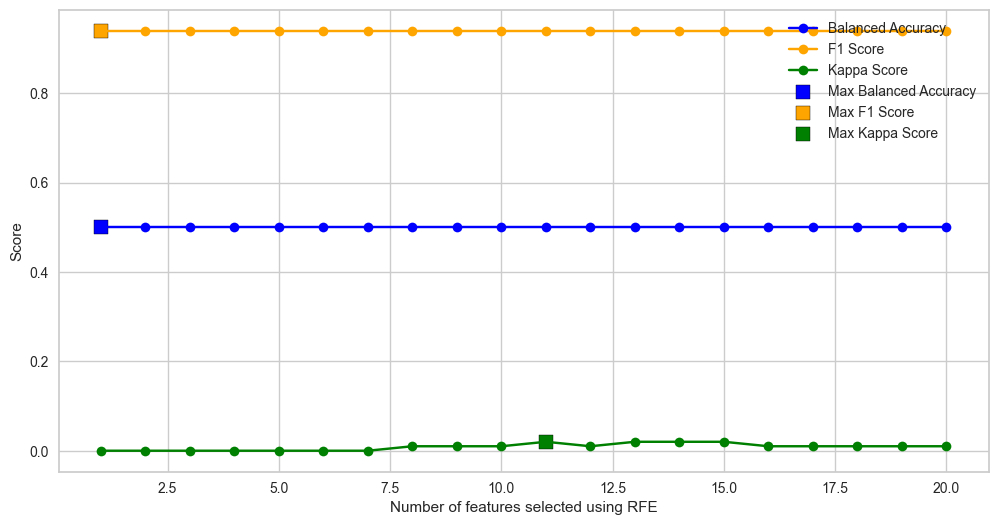

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(k_list, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
plt.plot(k_list, f1_score_list, marker='o', label='F1 Score', color='orange')
plt.plot(k_list, kappa_list, marker='o', label='Kappa Score', color='green')

# Menghitung nilai maksimum
max_bal_acc = np.max(bal_acc_list)
max_f1 = np.max(f1_score_list)
max_kappa = np.max(kappa_list)

# Menampilkan nilai maksimum
plt.scatter(np.argmax(bal_acc_list) + 1, max_bal_acc, color='blue', s=100, edgecolor='black', label='Max Balanced Accuracy', marker='s')
plt.scatter(np.argmax(f1_score_list) + 1, max_f1, color='orange', s=100, edgecolor='black', label='Max F1 Score', marker='s')
plt.scatter(np.argmax(kappa_list) + 1, max_kappa, color='green', s=100, edgecolor='black', label='Max Kappa Score', marker='s')

# Menambahkan label dan judul
plt.xlabel('Number of features selected using RFE')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print('Max Bal Acc:', max_bal_acc)
print('Max F1 score:', max_f1)
print('Max kappa:', max_kappa)

Max Bal Acc: 0.5
Max F1 score: 0.94
Max kappa: 0.02


In [ ]:
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1
best_k_using_bal_acc

1

In [ ]:
RFE_selector = RFE(estimator=xgb, n_features_to_select=best_k_using_bal_acc, step=1)
RFE_selector.fit(X_train_v3, y_train_v3)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['Pengeluaran_Jenis_D'], dtype='object')

Bal Accuracy (Train) : 0.5
F1 score (Train)     : 0.94
Kappa (Train)        : 0.0
Bal Accuracy (Test)  : 0.5
F1 score (Test)      : 0.94
Kappa (Test)         : 0.0


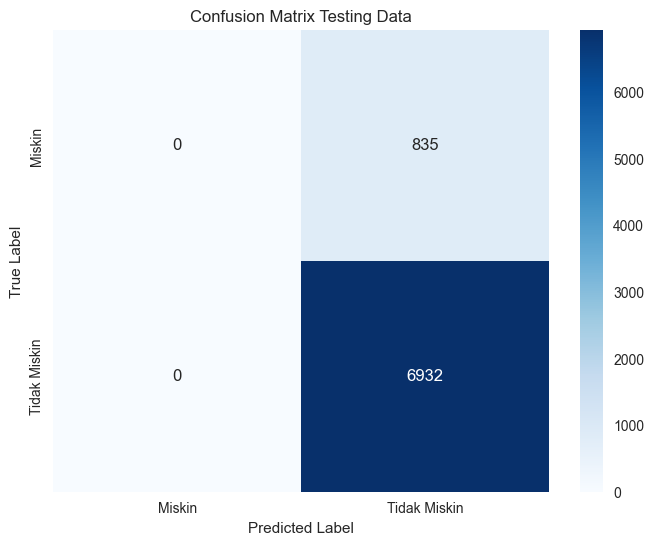

In [ ]:
eval_model_holdout(xgb, X_train[selected_features], y_train,
                   X_test[selected_features], y_test, plot=True)